In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Lecture 8 Tasks. Linear Regression

# I. ЖЕҢІЛ ЕСЕПТЕР (Beginner)

In [104]:
# Task 1

X = [1, 2, 3, 4, 5, 2, 4, 5, 4, 6]
y = [2, 4, 5, 4, 6, 2, 3, 4, 5, 2]

In [105]:
# y = wX + b
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_mean = np.mean(X)
y_mean = np.mean(y)

print(x_mean, y_mean)

3.6 3.7


In [106]:
w = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
b = y_mean - w * x_mean

In [107]:
y_pred = w * X + b

Weight (w): 0.25892857142857145
Bias (b): 2.767857142857143
Predicted values: [3.02678571 3.28571429 3.54464286 3.80357143 4.0625     3.28571429
 3.80357143 4.0625     3.80357143 4.32142857]


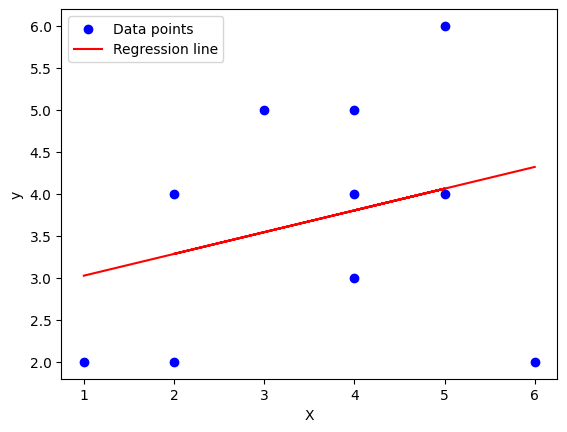

In [108]:
print(f"Weight (w): {w}")
print(f"Bias (b): {b}") 
print(f"Predicted values: {y_pred.flatten()}")
# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Task 2

In [109]:
X = np.array([[10], [20], [30], [40], [50]])
y = np.array([15, 25, 35, 45, 60])

In [110]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
y_pred = model.predict(X)

w: [1.1]
b: 3.0


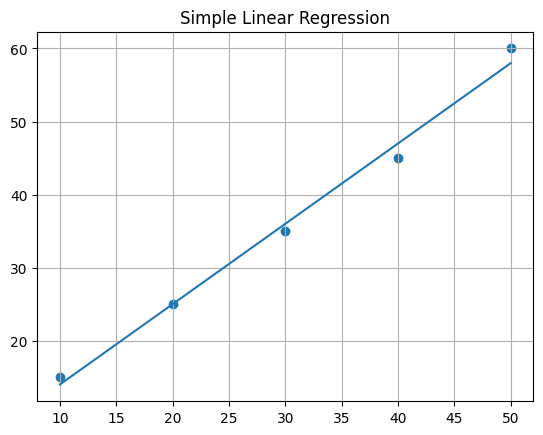

In [112]:
print("w:", model.coef_)
print("b:", model.intercept_)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.title("Simple Linear Regression")
plt.grid()
plt.show()

In [113]:
w = model.coef_[0]
b = model.intercept_

print(f"coef_: {w:.2f}")
print(f"intercept_: {b:.2f}")

coef_: 1.10
intercept_: 3.00


In [114]:
x_new = np.array([[60]])

prediction = model.predict(x_new)
print(prediction[0])

69.0


### Task 3. Қате есептеу (MSE)

In [115]:
print("MSE:", mean_squared_error(y, y_pred))

MSE: 1.9999999999999942


In [116]:
errors = y - y_pred.flatten()
squred_errors = errors ** 2 
mse = np.mean(squred_errors) 
print(mse)

1.9999999999999942


# II. ОРТА ДЕҢГЕЙ (Intermediate)


### Task 4. Train / Test бөлу

In [117]:
df = pd.read_csv('../data/spotify_songs.csv')

In [118]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]
y = df['track_popularity']

In [119]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_period = model.predict(X_train)
y_test_period = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_period)
mse_test = mean_squared_error(y_test, y_test_period)

print(mse_train)
print(mse_test)
print(f'RMSE: {mse_test ** 0.5}')

587.0525601807685
583.8346151735203
RMSE: 24.162669868487637


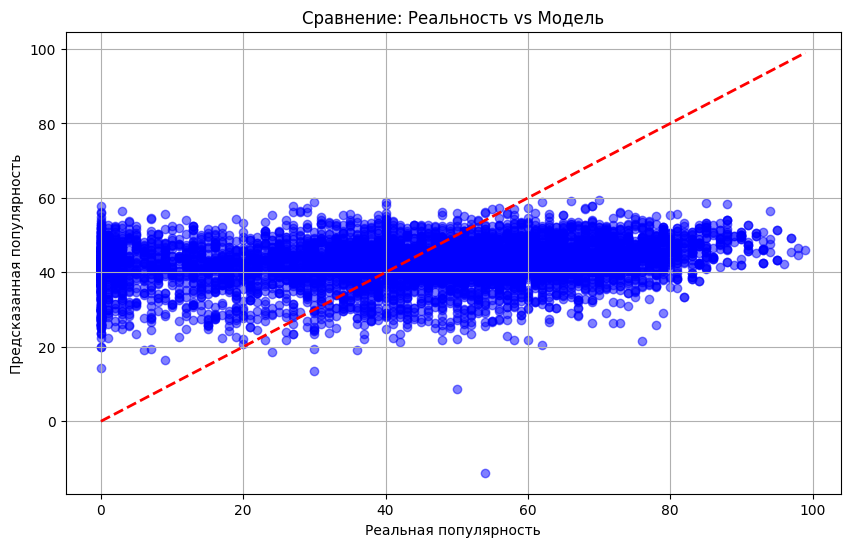

In [ ]:
test_preds = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, color='blue', alpha=0.5) # Реальность по X, Предсказание по Y
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Линия идеального предсказания

plt.xlabel("Реальная популярность")
plt.ylabel("Предсказанная популярность")
plt.title("Сравнение: Реальность vs Модель")
plt.grid(True)
plt.show()

### 🟡 Task 5. Ridge регрессияны қосу


In [121]:
# alpha = 0.1 

ridge_model_1 = Ridge(alpha=0.1)
ridge_model_1.fit(X_train, y_train)

ridge_1_train_preds = ridge_model_1.predict(X_train)
ridge_1_test_preds = ridge_model_1.predict(X_test)

ridge_mse_1_train = mean_squared_error(y_train, ridge_1_train_preds)
ridge_mse_1_test = mean_squared_error(y_test, ridge_1_test_preds)

print(f"Ridge(alpha = 0.1) of MSE Train: {ridge_mse_1_train}")
print(f"Ridge(alpha = 0.1) of MSE Test: {ridge_mse_1_test}")


Ridge(alpha = 0.1) of MSE Train: 587.0525611851101
Ridge(alpha = 0.1) of MSE Test: 583.834681014587


In [122]:
# alpha = 10

ridge_model_2 = Ridge(alpha=10)
ridge_model_2.fit(X_train, y_train)

ridge_2_train_preds = ridge_model_2.predict(X_train)
ridge_2_test_preds = ridge_model_2.predict(X_test)

ridge_mse_2_train = mean_squared_error(y_train, ridge_2_train_preds)
ridge_mse_2_test = mean_squared_error(y_test, ridge_2_test_preds)

print(f"Ridge(alpha = 10) of MSE Train: {ridge_mse_2_train}")
print(f"Ridge(alpha = 10) of MSE Test: {ridge_mse_2_test}")


Ridge(alpha = 10) of MSE Train: 587.0620310250486
Ridge(alpha = 10) of MSE Test: 583.8498019137161


### Task 6. Alpha әсерін зерттеу (опциональная)

In [123]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
weights = []
mse = []

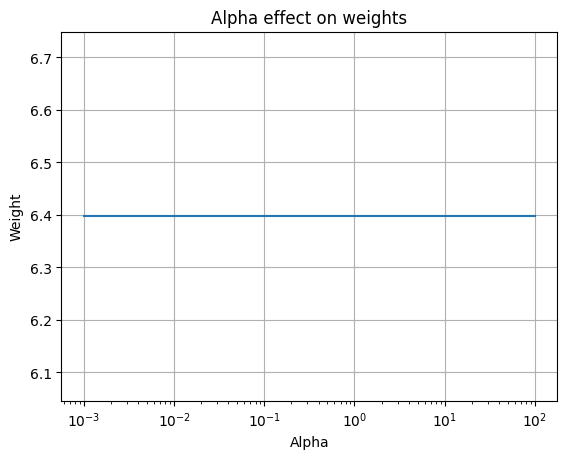

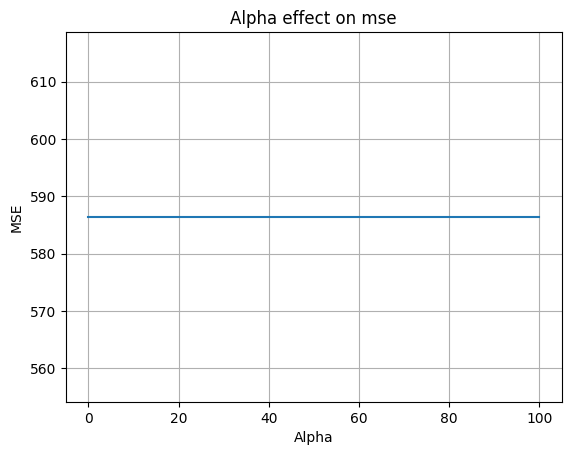

In [124]:
for i in alphas:
    ridge = Ridge(alpha=8)
    ridge.fit(X, y)
    weights.append(ridge.coef_[0])
    y_ridge = ridge.predict(X)
    mse_value = mean_squared_error(y, y_ridge)
    mse.append(mse_value)

plt.plot(alphas, weights)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Weight")
plt.title("Alpha effect on weights")
plt.grid()
plt.show()

plt.plot(alphas, mse)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Alpha effect on mse")
plt.grid()
plt.show()

# III. КҮРДЕЛІ ЕСЕПТЕР (Advanced)

### 🔴 Task 7. Үлкен feature саны

In [155]:
np.random.seed(42)
x_multi = np.random.rand(100, 10)
y_multi = x_multi @ np.random.rand(10) + np.random.rand(100)

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_multi, y_multi)

In [163]:
model_c = LinearRegression()
model_c.fit(x_train_c, y_train_c)

y_train_period_c = model_c.predict(x_train_c)
y_test_period_c = model_c.predict(x_test_c)

mse_train_c = mean_squared_error(y_train_c, y_train_period_c)
mse_test_c = mean_squared_error(y_test_c, y_test_period_c)

print(f"Regression Train MSE: {mse_train_c:.4f}")
print(f"Regression Test MSE: {mse_test_c:.4f}")

Regression Train MSE: 0.0996
Regression Test MSE: 0.0884


In [164]:
model_ridge_c = Ridge(alpha=0.1)
model_ridge_c.fit(x_train_c, y_train_c)

y_train_period_ridge_c = model_ridge_c.predict(x_train_c)
y_test_period_ridge_c = model_ridge_c.predict(x_test_c)

mse_train_ridge_c = mean_squared_error(y_train_c, y_train_period_ridge_c)
mse_test_ridge_c = mean_squared_error(y_test_c, y_test_period_ridge_c)

print(f"Ridge Train MSE: {mse_train_ridge_c:.4f}")
print(f"Ridge Test MSE: {mse_test_ridge_c:.4f}")

Ridge Train MSE: 0.0997
Ridge Test MSE: 0.0873


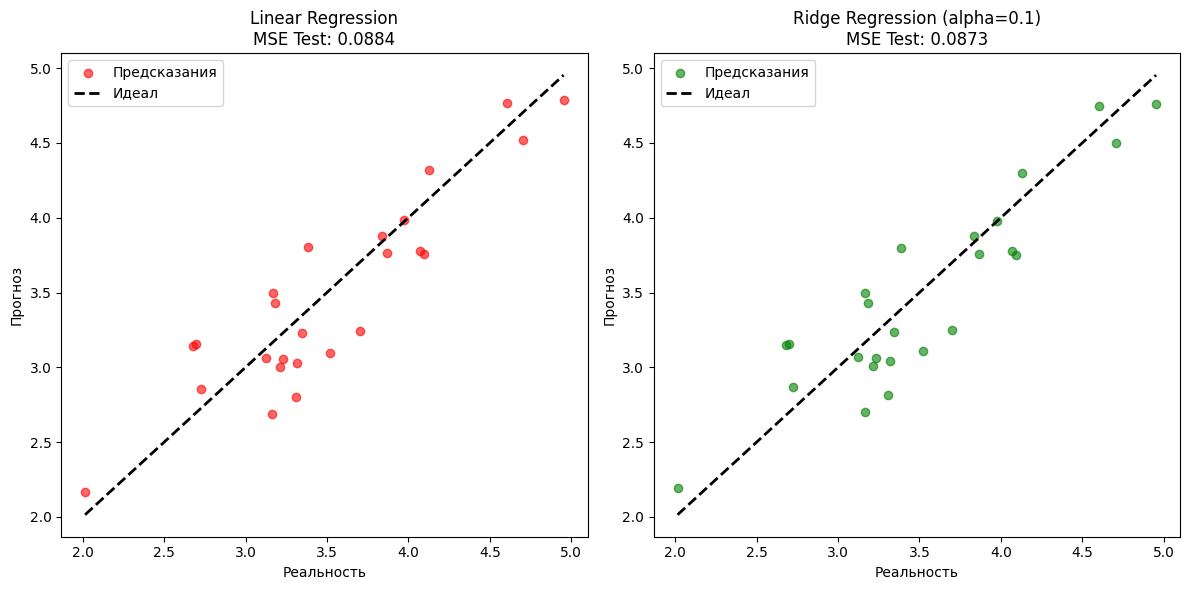

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_c, y_test_period_c, color='red', alpha=0.6, label='Prediction')
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'k--', lw=2, label='Linear line')
plt.title(f'Linear Regression\nMSE Test: {mse_test_c:.4f}')
plt.xlabel('Real')
plt.ylabel('Predic')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_c, y_test_period_ridge_c, color='green', alpha=0.6, label='Предсказания')
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'k--', lw=2, label='Linear line')
plt.title(f'Ridge Regression (alpha=0.1)\nMSE Test: {mse_test_ridge_c:.4f}')
plt.xlabel('Real')
plt.ylabel('Predic')
plt.legend()

plt.tight_layout()
plt.show()

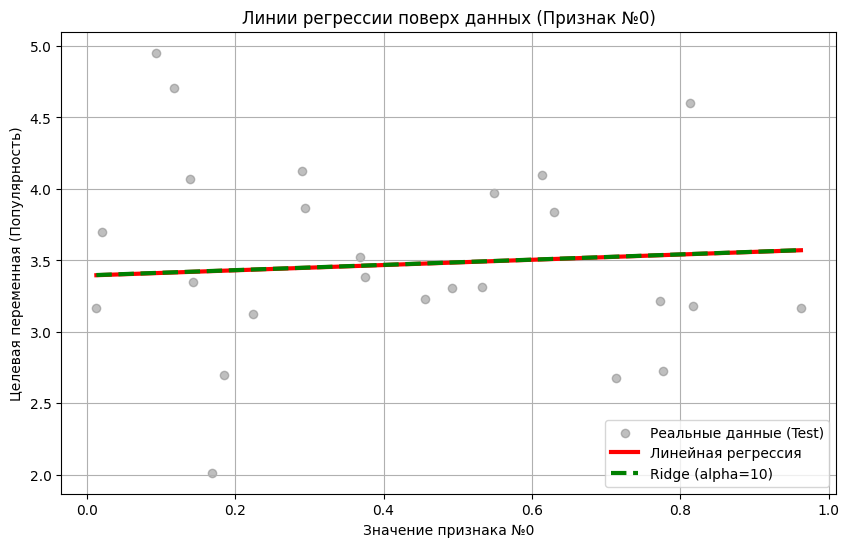

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_idx = 0

x_line = np.linspace(x_test_c[:, feature_idx].min(), x_test_c[:, feature_idx].max(), 100).reshape(-1, 1)

x_for_pred = np.full((100, 10), x_test_c.mean(axis=0)) 
x_for_pred[:, feature_idx] = x_line.flatten()

y_line_linear = model_c.predict(x_for_pred)
y_line_ridge = model_ridge_c.predict(x_for_pred)

plt.figure(figsize=(10, 6))
plt.scatter(x_test_c[:, feature_idx], y_test_c, color='gray', alpha=0.5, label='Real data (Test)')
plt.plot(x_line, y_line_linear, color='red', linewidth=3, label='Linear Regression')
plt.plot(x_line, y_line_ridge, color='green', linewidth=3, linestyle='--', label='Ridge (alpha=10)')
plt.title(f"Linear Regression Visual (Future №{feature_idx})")
plt.xlabel(f"Future Label №{feature_idx}")
plt.ylabel("Popularity")
plt.legend()
plt.grid(True)
plt.show()